# In this section, we'll discuss linear transformation techniques like PCA, LDA for dimensionaly reduction.
# Note: PCA and LDA can be applied only on linearly separable data. 
# For nonlinear problems, Kernel PCA is available

# What is Covariance
Check the below covariance equation between 2 features xk & xj and covariance matrix(sigma) of 3 features:

Covariance between 2 features xj and xk:


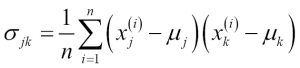

Covariance Matrix for 3 features:


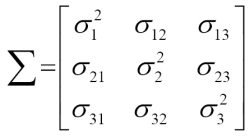

In [6]:
from IPython.display import Image, display
print "Covariance between 2 features xj and xk:"
x = Image("/Users/surthi/gitrepos/ml-notes/images/covariance.jpg")
display(x)

print "Covariance Matrix for 3 features:"
y = Image("/Users/surthi/gitrepos/ml-notes/images/covariance-matrix.jpg")
display(y)

# what does covariance tell?
A positive covariance between two features indicates that the features increase or decrease together, whereas a negative covariance indicates that the features vary in opposite directions.

# What are EigenValue and EigenVector for?
The eigenvectors of the covariance matrix represent the principal components (the directions of maximum variance), whereas the corresponding eigenvalues will define their magnitude.

# PCA: Unsupervised feature extraction a.k.a dimensionality reduction
- Idea is to reduce the dimensionality of our dataset by compressing it onto a new feature subspace
- So, we only select the subset of the eigenvectors (principal components) that contains most of the information (variance). 
- Since the eigenvalues define the magnitude of the eigenvectors, sort eigenvalues by decreasing magnitude;
- Now, take the top k eigenvectors based on the values of their corresponding eigenvalues. 
- Create projection matrix (W) out of the top k eigenvectors.
- Project X onto new dimension via XW
- Let's see how to apply above discussed idea:
        - X = 124 x 13 (124 samples with 13 features)
        - k = 2
        - Then W = 13 x 2
        - X' = XW = 124 x 2 <b> TADA!! feature reduction done </b>
- In practice, the number of principal components(k) has to be determined from a trade-off between computational efficiency and the performance of the classifier

# LDA: Supervised feature extraction
Algorithm:
- Standardize the d-dimensional dataset (d is the number of feature)
- For each class, compute the d-dimensional mean vector.
- mean vector = per feature mean value with respect to samples in calss i
- Construct the between-class scatter matrix(S[B]) and the within-class scatter matrix(S[W]).
- Compute the eigenvectors and corresponding eigenvalues of the matrix (S[W]^-1 S[B]).
- Choose the k eigenvectors that correspond to the k largest eigenvalues to construct a dxk -dimensional transformation matrix W
- Project the samples onto the new feature subspace using the transformation matrix W

# NOTE
- The covariance matrix is a normalized version of the scatter matrix.
- In LDA, the number of linear discriminants is at most c-1 where c is the number of class labels, since the in-between class scatter matrix S[B] is the sum of c matrices with rank 1 or less.

# PCA vs LDA Analysis

LDA: we only have two nonzero eigenvalues (Wow!!)


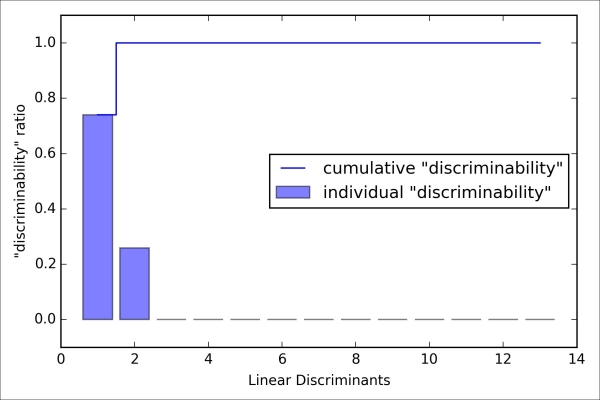

PCA: its a rare case of perfect collinearity (all aligned sample points fall on a straight line), that the covariance matrix would have rank one, which would result in only one eigenvector with a nonzero eigenvalue


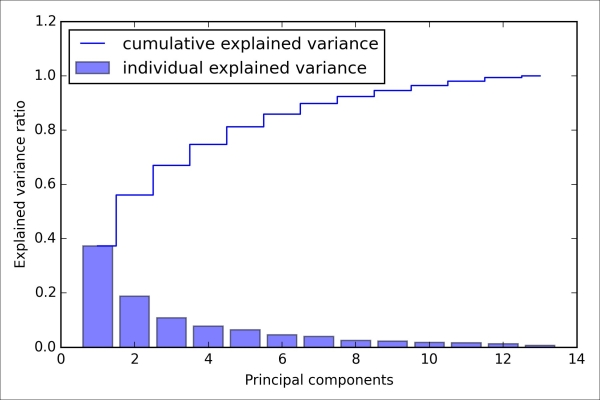

In [8]:
x = Image("/Users/surthi/gitrepos/ml-notes/images/lda-feature-importance.jpg")
y = Image("/Users/surthi/gitrepos/ml-notes/images/pca-feature-importance.jpg")
print "LDA: we only have two nonzero eigenvalues (Wow!!)"
display(x)
print "PCA: its a rare case of perfect collinearity (all aligned sample points fall on a straight line), that the covariance matrix would have rank one, which would result in only one eigenvector with a nonzero eigenvalue"
display(y)

# Analysis of above graphs:
Thus, we might intuitively think that LDA is a superior feature extraction technique for classification tasks compared to PCA. However, A.M. Martinez reported that preprocessing via PCA tends to result in better classification results in an image recognition task in certain cases, for instance, if each class consists of only a small number of samples 


# PCA VS LDA
- Both are linear transformation techniques used to reduce #dimensions in the dataset.
- unsupervised PCA vs Supervised LDA
- PCA attempts to find the orthogonal component axes of maximum variance in a dataset whereas 
the goal in LDA is to find the feature subspace that optimizes class separability.


# LDA Assumptions
1. data is normally distributed.
2. classes have identical covariance matrices
3. features are statistically independent of each other.

(Note: However, even if one or more of those assumptions are slightly violated,
LDA for dimensionality reduction can still work reasonably well)

# Kernel PCA
- With kernel PCA, we will learn how to transform data that is <b><u>not linearly separable onto a new, lower-dimensional subspace that is suitable for linear classifiers.</u></b>
- via kernel PCA we perform a nonlinear mapping that transforms the data onto a higher-dimensional space and use standard PCA in this higher-dimensional space to project the data back onto a lower-dimensional space where the samples can be separated by a linear classifier
- Basically, the kernel function (or simply kernel) can be understood as a function that calculates a dot product between two vectors—a measure of similarity.
- The most commonly used kernels are as follows: Polynomial Kernel, The hyperbolic tangent (sigmoid) kernel, The Radial Basis Function (RBF) or Gaussian kernel
- One downside of using an RBF kernel PCA for dimensionality reduction is that we have to
specify the parameter gamma a priori. Finding an appropriate value for gamma requires experimentation and is best done using algorithms for parameter tuning, for example, grid search

# Q&A
*********************************************************************************************************************
How can we know if data is linearly separable or not when we have lots of features. We need to know if its linear or not before we can apply linear dimensionality reduction techniques like PCA/LDA
*********************************************************************************************************************
- In LDA, the number of linear discriminants is at most c-1 where c is the number of class labels, since the in-between class scatter matrix S[B] is the sum of c matrices with rank 1 or less.
- TODO: check why the results are not matching with scikit lda (5.2#7)
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l,c,m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_lda[y_train==l, 0], X_train_lda[y_train==l, 1], c=c, label=l, marker=m)

plt.xlabel("LD1")
plt.ylabel("LD2")
plt.legend(loc="upper right")
plt.show()
print X_train_std.shape, X_train_lda.shape